# Hotel Review Sentiment Analysis

In [ ]:
#!pip install nltk
#!pip install textblob
#!pip install wordcloud


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

plt.style.use('ggplot')
import nltk

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IIT Madras/Diploma/BDM Project/Data/Google_Reviews.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                468 non-null    int64  
 1   Guest name        468 non-null    object 
 2   Review on         468 non-null    object 
 3   Review Site       468 non-null    object 
 4   Review            145 non-null    object 
 5   Rooms ratings     70 non-null     float64
 6   Service ratings   9 non-null      object 
 7   Location ratings  69 non-null     float64
 8   Overall ratings   468 non-null    int64  
 9   Hotel highlights  9 non-null      object 
 10  Purpose           31 non-null     object 
 11  Guest type        0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 44.0+ KB


In [ ]:
df.head()

,Id,Guest name,Review on,Review Site,Review,Rooms ratings,Service ratings,Location ratings,Overall ratings,Hotel highlights,Purpose,Guest type
0,1,satish deshpande,4 months ago,Google,"The rooms were spotless, service was prompt, a...",4.0,5,5.0,4,Luxury and Quiet and Great value,Holiday and Family,NaN
1,2,Rutvik Thomare,3 months ago,Google,Near bus stop and other main location chaupati...,5.0,5,5.0,5,NaN,Holiday and Family,NaN
2,3,Sean Lall,1 year ago,Google,Good location few minutes walk from the bus st...,5.0,4,5.0,4,NaN,Holiday and Family,NaN
3,4,manoj makwana,7 months ago,Google,All time best hotel. I have been booking regul...,4.0,4,4.0,4,NaN,NaN,NaN
4,5,Vijay Visavadia,9 months ago,Google,"Best hotel in porbandar. Best food, staff, roo...",5.0,5,5.0,5,NaN,NaN,NaN


In [ ]:
df[['Purpose', 'Guest type']] =  df['Purpose'].str.split('and', expand=True)

# Splitted the rows, as have decided to use it afterwards (Not in this task, but for something else)

In [ ]:
df.head()

,Id,Guest name,Review on,Review Site,Review,Rooms ratings,Service ratings,Location ratings,Overall ratings,Hotel highlights,Purpose,Guest type
0,1,satish deshpande,4 months ago,Google,"The rooms were spotless, service was prompt, a...",4.0,5,5.0,4,Luxury and Quiet and Great value,Holiday,Family
1,2,Rutvik Thomare,3 months ago,Google,Near bus stop and other main location chaupati...,5.0,5,5.0,5,NaN,Holiday,Family
2,3,Sean Lall,1 year ago,Google,Good location few minutes walk from the bus st...,5.0,4,5.0,4,NaN,Holiday,Family
3,4,manoj makwana,7 months ago,Google,All time best hotel. I have been booking regul...,4.0,4,4.0,4,NaN,NaN,NaN
4,5,Vijay Visavadia,9 months ago,Google,"Best hotel in porbandar. Best food, staff, roo...",5.0,5,5.0,5,NaN,NaN,NaN


In [ ]:
df.shape

(468, 12)

In [ ]:
df.isnull().sum()

,0
Id,0
Guest name,0
Review on,0
Review Site,0
Review,323
Rooms ratings,398
Service ratings,459
Location ratings,399
Overall ratings,0
Hotel highlights,459


In [ ]:
# Drop rows where 'Review' is NaN
df = df.dropna(subset=['Review'])

In [ ]:
df = df[['Id', 'Review', 'Overall ratings']]

In [ ]:
df.shape

(145, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 144
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               145 non-null    int64 
 1   Review           145 non-null    object
 2   Overall ratings  145 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.5+ KB


In [ ]:
df.duplicated().sum()

0

### Exploratory data analysis (EDA)

Text(0.5, 0, 'Review stars')

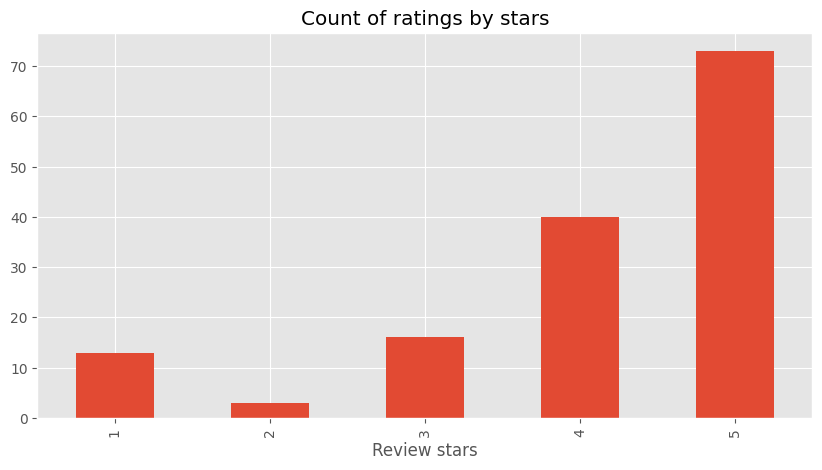

In [ ]:
ax = df['Overall ratings'].value_counts().sort_index() \
    .plot(kind = 'bar',
          title = 'Count of ratings by stars',
          figsize = (10,5))

ax.set_xlabel('Review stars')

In [ ]:
# Get the length of each review

df['review_length'] = [len(i) for i in df.Review]

# Get the number of tokens per review
df['Words'] = [len(i.split()) for i in df.Review]

In [ ]:
df.head()

,Id,Review,Overall ratings,review_length,Words
0,1,"The rooms were spotless, service was prompt, a...",4,299,44
1,2,Near bus stop and other main location chaupati...,5,243,42
2,3,Good location few minutes walk from the bus st...,4,189,36
3,4,All time best hotel. I have been booking regul...,4,127,22
4,5,"Best hotel in porbandar. Best food, staff, roo...",5,310,54


In [ ]:
# Basic statistics of review length

print('Review Length Description')
print(df['review_length'].describe())

Review Length Description
count    145.000000
mean      99.455172
std       89.072612
min        4.000000
25%       30.000000
50%       63.000000
75%      162.000000
max      328.000000
Name: review_length, dtype: float64


In [ ]:
# Basic statistics of Words count

print(df['Words'].describe())

count    145.000000
mean      17.641379
std       16.281242
min        1.000000
25%        5.000000
50%       10.000000
75%       28.000000
max       61.000000
Name: Words, dtype: float64


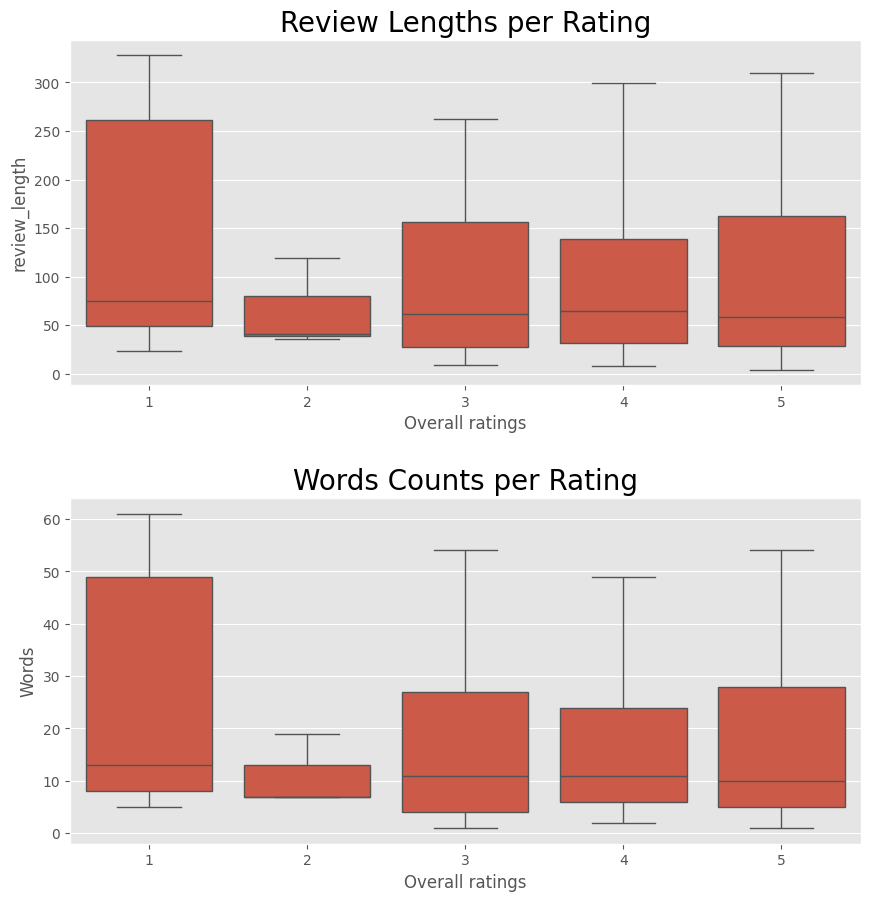

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

# Set the spacing between subplots
fig.tight_layout(pad=6.0)

# Plot Range of Review Lengths per Rating
ax1.set_title('Review Lengths per Rating', fontsize=20)
sns.boxplot(data=df, y='review_length', x='Overall ratings',
            ax=ax1)

# Plot Range of Words Counts per Rating
ax2.set_title('Words Counts per Rating', fontsize=20)
sns.boxplot(data=df, y='Words', x='Overall ratings',
            ax=ax2);

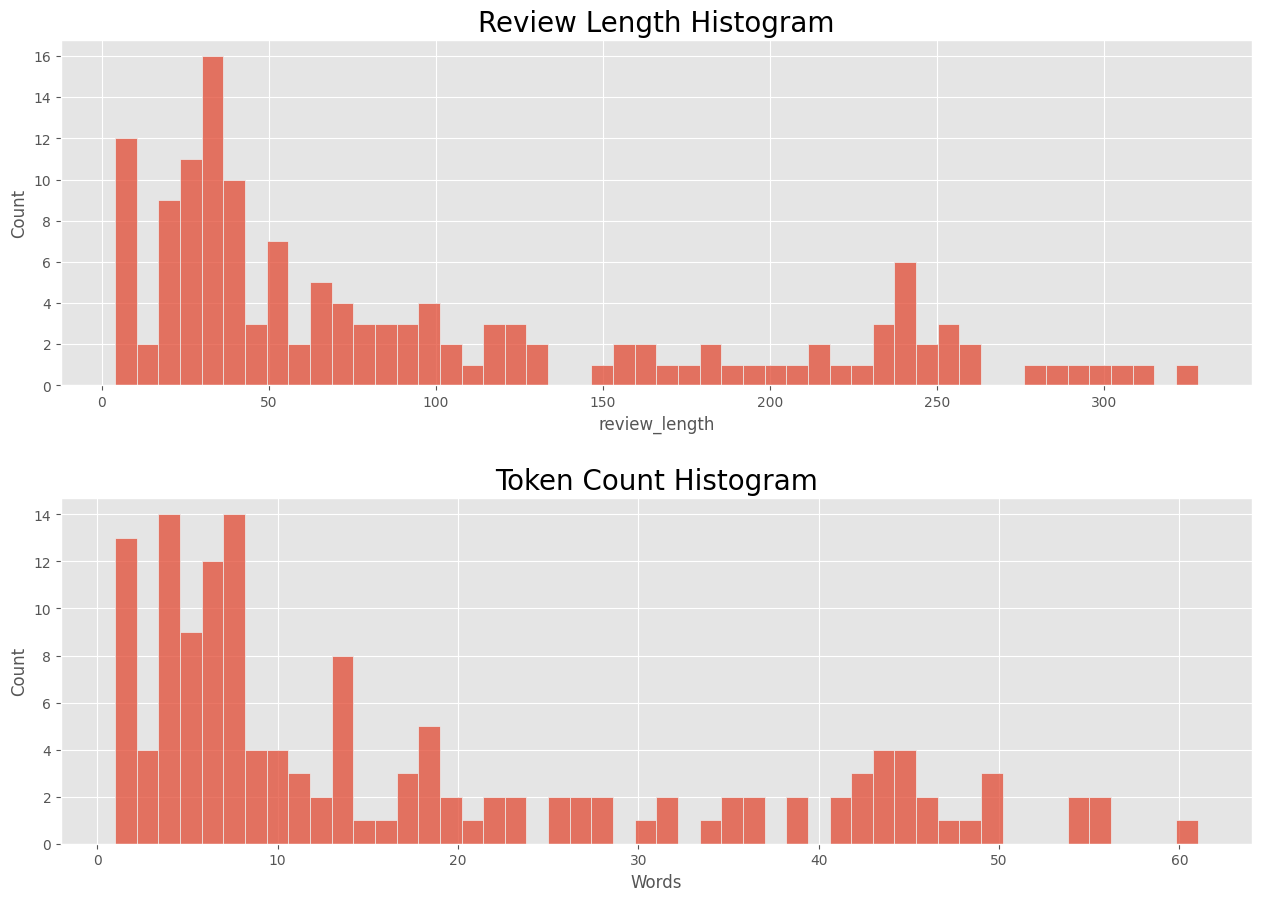

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 10))

# Set the spacing between subplots
fig.tight_layout(pad=6.0)

# Generate Train Rating Histogram
ax1.set_title('Review Length Histogram', fontsize=20)
sns.histplot(data=df, x='review_length', bins=50,
            ax=ax1)

# Generate Train Token Count Histogram
ax2.set_title('Token Count Histogram', fontsize=20)
sns.histplot(data=df, x='Words', bins=50,
            ax=ax2);

### Basic NLTK

In [ ]:
# Converting to lower case

df['Review'] = df['Review'].str.lower()
df['Review'][0]

'the rooms were spotless, service was prompt, and the staff were courteous with reasonable rate. additionally, their in-house kitchen serves incredibly delicious food. i highly recommend staying here to enjoy the delightful cuisine. best place to stay in porbandar.market and tourist places are near.'

In [ ]:
# Removing all non-alphanumeric characters

df['Review'] = df['Review'].str.replace('[^\w\s]', '', regex = True)
df['Review'][0]

'the rooms were spotless service was prompt and the staff were courteous with reasonable rate additionally their inhouse kitchen serves incredibly delicious food i highly recommend staying here to enjoy the delightful cuisine best place to stay in porbandarmarket and tourist places are near'

In [ ]:
# Removing all the digits

df['Review'] = df['Review'].str.replace('\d', '', regex = True)
df['Review'][0]

'the rooms were spotless service was prompt and the staff were courteous with reasonable rate additionally their inhouse kitchen serves incredibly delicious food i highly recommend staying here to enjoy the delightful cuisine best place to stay in porbandarmarket and tourist places are near'

In [ ]:
# Getting the list of stopwords

nltk.download('stopwords')
from nltk.corpus import stopwords


# Extend stopword list with custom words
custom_stopwords = set(stopwords.words('english') + ['hotel', 'stay', 'room', 'guest', 'staff'])
df['Review'] = df['Review'].apply(lambda x: " ".join(
    word for word in str(x).split() if word not in custom_stopwords
))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Removing all the stopwords

df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in custom_stopwords))
df['Review'][0]

'rooms spotless service prompt courteous reasonable rate additionally inhouse kitchen serves incredibly delicious food highly recommend staying enjoy delightful cuisine best place porbandarmarket tourist places near'

In [ ]:
from textblob import Word, TextBlob
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Lemmatize the words i.e. converts to the simple form (Running >> Run)

df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Review']

,Review
0,room spotless service prompt courteous reasona...
1,near bus stop main location chaupati also good...
2,good location minute walk bus station small is...
3,time best booking regularly since start town k...
4,best porbandar best food service reception fri...
...,...
140,
141,good place
142,good costly
143,good service


In [ ]:
# Counting the frequency of the words used

temp_df = pd.Series(' '.join(df['Review']).split()).value_counts().reset_index()

In [ ]:
temp_df.columns = ['words', 'tf']

In [ ]:
temp_df_sorted = temp_df.sort_values(by = 'tf', ascending = False)
temp_df_sorted

,words,tf
0,good,87
1,service,55
2,room,32
3,nice,32
4,clean,20
...,...,...
300,accommodation,1
299,staf,1
298,arrangement,1
297,hve,1


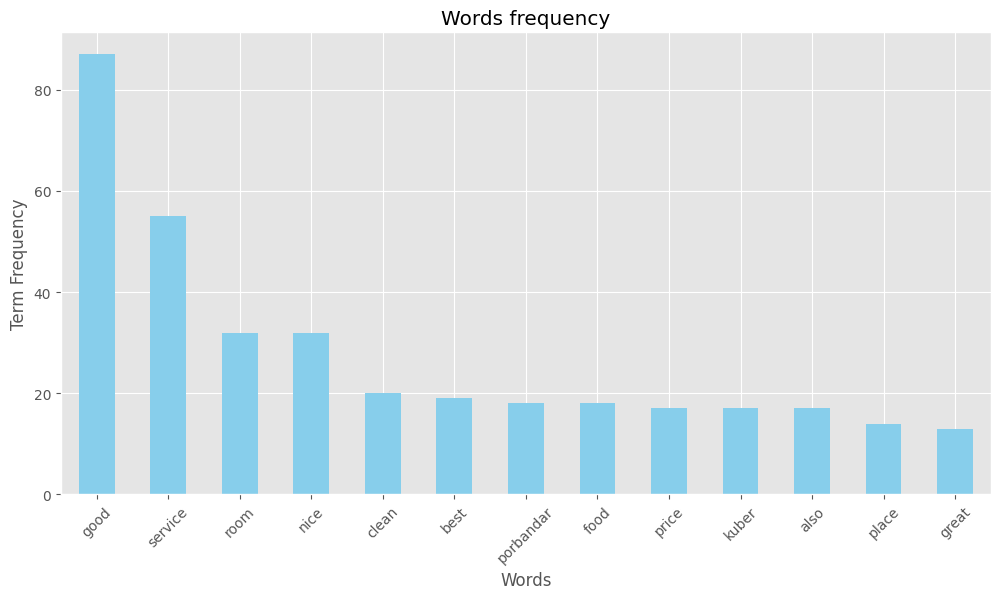

In [ ]:
temp_df_sorted[temp_df_sorted['tf'] > 10].plot.bar( x = "words", y = "tf", figsize=(12,6), legend = False, color = "skyblue")
plt.title("Words frequency")
plt.xlabel("Words")
plt.ylabel("Term Frequency")
plt.xticks(rotation = 45)
plt.show()


In [ ]:
drops = temp_df.loc[temp_df['tf'] == 1]

drops = drops['words']

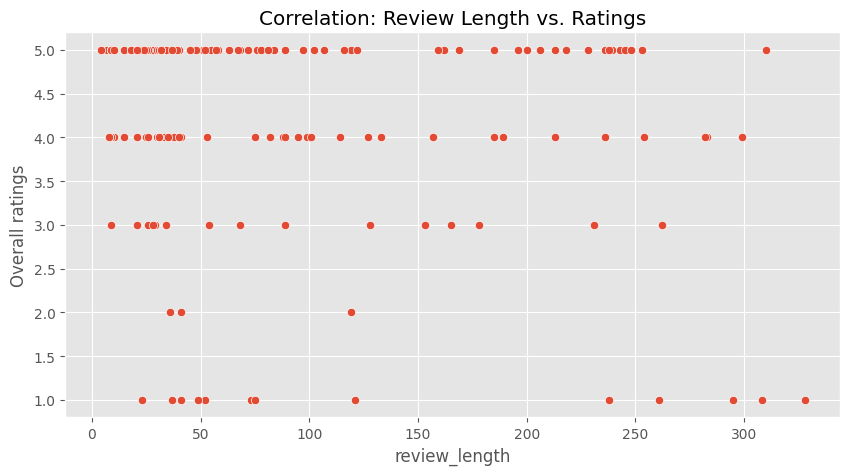

In [ ]:
# Correlation between review lengths and ratings
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='review_length', y='Overall ratings')
plt.title("Correlation: Review Length vs. Ratings")
plt.show()

In [ ]:
# Removing the words, which occured only once

df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df['Review'].head()

,Review
0,room spotless service prompt courteous reasona...
1,near bus stop main location chaupati also good...
2,good location minute walk bus station small is...
3,time best booking regularly since start town k...
4,best porbandar best food service reception fri...


In [ ]:
# Makes a list of the words used in the review, i.e. tokenize the review statements.

nltk.download('punkt_tab')

df['Review'].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Review
0,"[room, spotless, service, prompt, courteous, r..."
1,"[near, bus, stop, main, location, chaupati, al..."
2,"[good, location, minute, walk, bus, station, s..."
3,"[time, best, booking, regularly, since, start,..."
4,"[best, porbandar, best, food, service, recepti..."


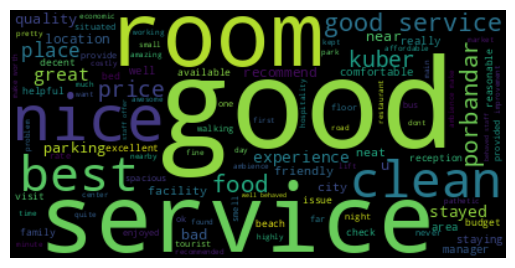

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

text = " ".join(i for i in df.Review)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# SENTIMENT ANALYSIS

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df["Review"].head()

,Review
0,room spotless service prompt courteous reasona...
1,near bus stop main location chaupati also good...
2,good location minute walk bus station small is...
3,time best booking regularly since start town k...
4,best porbandar best food service reception fri...


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores("The room was very good")

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

Compound: 0.6249

In [ ]:
sia.polarity_scores("I liked this hotel but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

Compound: -0.298

In [ ]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

,Review
0,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp..."
1,"{'neg': 0.084, 'neu': 0.575, 'pos': 0.341, 'co..."
2,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp..."
3,"{'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'comp..."
4,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp..."
5,"{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp..."
6,"{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'comp..."
7,"{'neg': 0.201, 'neu': 0.688, 'pos': 0.111, 'co..."
8,"{'neg': 0.078, 'neu': 0.461, 'pos': 0.461, 'co..."
9,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [ ]:
df["polarity_score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [ ]:
df.head()

,Id,Review,Overall ratings,review_length,Words,polarity_score
0,1,room spotless service prompt courteous reasona...,4,299,44,0.9704
1,2,near bus stop main location chaupati also good...,5,243,42,0.6908
2,3,good location minute walk bus station small is...,4,189,36,0.8271
3,4,time best booking regularly since start town k...,4,127,22,0.8885
4,5,best porbandar best food service reception fri...,5,310,54,0.9702


In [ ]:
# FEATURE ENGINEERING

In [ ]:
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [ ]:
df.head()

,Id,Review,Overall ratings,review_length,Words,polarity_score,sentiment_label
0,1,room spotless service prompt courteous reasona...,4,299,44,0.9704,pos
1,2,near bus stop main location chaupati also good...,5,243,42,0.6908,pos
2,3,good location minute walk bus station small is...,4,189,36,0.8271,pos
3,4,time best booking regularly since start town k...,4,127,22,0.8885,pos
4,5,best porbandar best food service reception fri...,5,310,54,0.9702,pos


In [ ]:
df["sentiment_label"].value_counts()

,count
sentiment_label,
pos,124
neg,21


In [ ]:
# Class imbalance issue is there, which needs to be address;

In [ ]:
df.groupby("sentiment_label")["Overall ratings"].mean()

,Overall ratings
sentiment_label,
neg,2.238095
pos,4.395161


In [ ]:
from sklearn.preprocessing import LabelEncoder

df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [ ]:
df.head()

,Id,Review,Overall ratings,review_length,Words,polarity_score,sentiment_label
0,1,room spotless service prompt courteous reasona...,4,299,44,0.9704,1
1,2,near bus stop main location chaupati also good...,5,243,42,0.6908,1
2,3,good location minute walk bus station small is...,4,189,36,0.8271,1
3,4,time best booking regularly since start town k...,4,127,22,0.8885,1
4,5,best porbandar best food service reception fri...,5,310,54,0.9702,1


In [ ]:
y = df["sentiment_label"] # dependent variable

In [ ]:
X = df["Review"] # independent variable

### Vectorization

###### Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [ ]:
X_count = vectorizer.fit_transform(X)

In [ ]:
vectorizer.get_feature_names_out()[:10]

array(['abusive', 'ac', 'accepting', 'accommodation', 'according',
       'added', 'additionally', 'affordable', 'africa', 'agree'],
      dtype=object)

In [ ]:
X_count.toarray()[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

###### N-Gram Frequency

In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [ ]:
X_n = vectorizer2.fit_transform(X)

In [ ]:
vectorizer2.get_feature_names_out()[:10]

array(['abusive language', 'ac geyser', 'accepting id',
       'accommodation good', 'according price', 'added facility',
       'additionally inhouse', 'affordable price', 'affordable rate',
       'agree resolved'], dtype=object)

In [ ]:
X_n.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

###### TF-IDF

###### Word

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_word_vectorizer = TfidfVectorizer()

In [ ]:
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

###### N-Gram

In [ ]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))

In [ ]:
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

In [ ]:
# EDA

In [ ]:
# Calculate Positive and Negative Review

train_pos = df[ df['sentiment_label'] == 1]
train_pos = train_pos['Review']
train_neg = df[ df['sentiment_label'] == 0]
train_neg = train_neg['Review']

pd.set_option('display.max_colwidth', None)

In [ ]:
train_neg

,Review
7,terrible would never recommend anyone bathroom wet bug fly picture website deceiving bed linen good towel old need refurbishment person per want sleep bed extra person sleep floor mattress folding bed
16,stayed night far beach r auto ride itthe reception first floor shop
17,pathetic disgusting disrespectful receptionist dont know talk lady check time reach pressurised leave even ask guard lock gate pay seriously one guy know talk else one pathetic
21,came kuber check pm entire family tired came ahmedabad reaching st manager told u thaf room cleaned wait minute waiting almost min
26,pathetichoteli paid r found horrible soap hot water bad smelling toilet dusty window lot u find better hotel rate far paid option negative rating otherwise would give
29,worst experience life pathetic people receptionist disrespectful rude kept shouting asked vacant soon tim check abusive language used tried threaten bad smell room would never recommend lady girl
35,price quite cheaper everyone hot water available bathing service employee markgood porbandar
53,good parking facility bad park back small street
59,service avesomeroom price also affordable price
74,bad experience parent scammed charged extra rupee added facility reason


In [ ]:
# Generate WordCloud Function

def wordCloud_generator(data, color, color_map):

    text = " ".join(i for i in df.Review)

    wordcloud = WordCloud(width = 1000, height = 1000,
                          background_color =color,
                          min_font_size = 12,
                          colormap= color_map,
                         ).generate(text)

    # plot the WordCloud image
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.show()

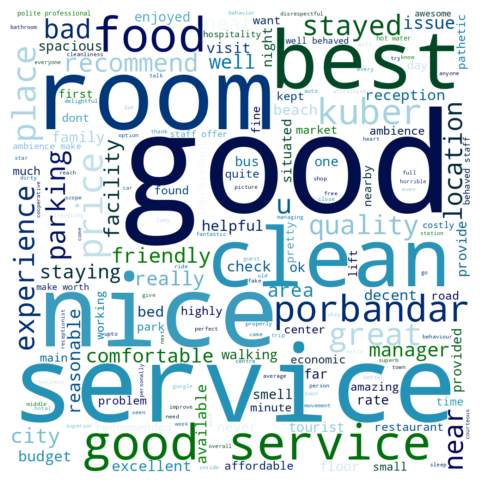

In [ ]:
# WordCloud for Positive Review

wordCloud_generator(train_pos, 'white', 'ocean')

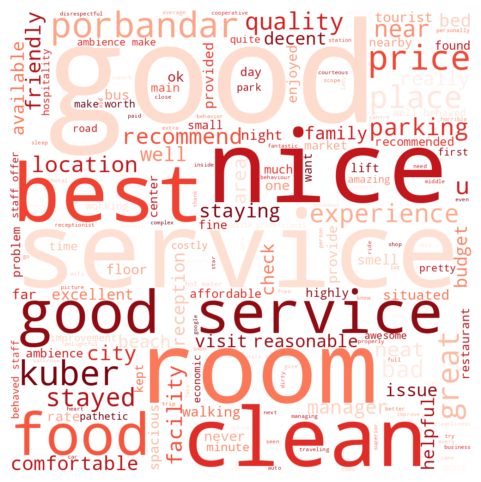

In [ ]:
# Wordcloud for Negative Review

wordCloud_generator(train_neg, 'white', 'Reds')

In [ ]:
# Create new dataframe to grouping the review star

top_rev = (df.groupby('Overall ratings')
            .agg(count=('Overall ratings', 'count'))
            .reset_index()
            .sort_values('count',ascending=False)
            )
top_rev

,Overall ratings,count
4,5,73
3,4,40
2,3,16
0,1,13
1,2,3


In [ ]:
# To work: To look for the keywords for reviews other than 5.

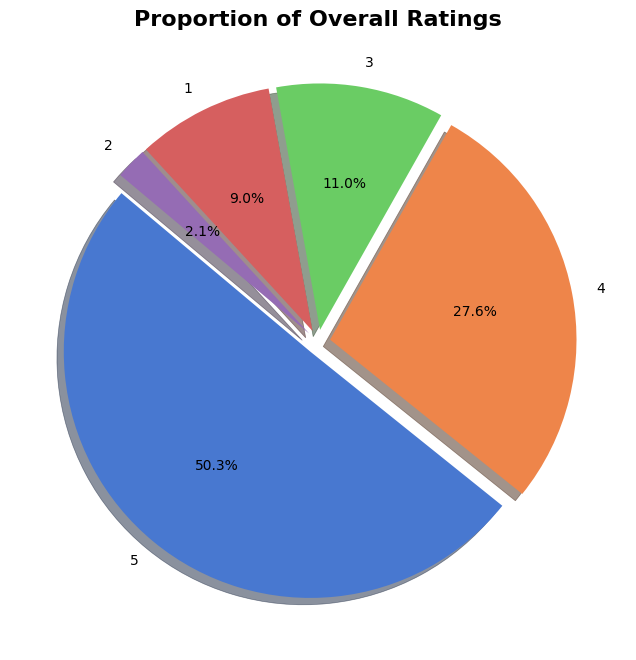

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette for the pie chart
colors = sns.color_palette("muted")[0:len(top_rev)]  # Light pastel colors for each rating category

# Plot a more visually appealing pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    top_rev['count'],
    labels=top_rev['Overall ratings'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    shadow=True,  # Adds a shadow effect
    explode=[0.05] * len(top_rev)  # Slightly separates each slice for emphasis
)
plt.title("Proportion of Overall Ratings", fontsize=16, fontweight='bold')
plt.show()


In [ ]:
# Suggestion to introduce: To use Computer Vision techniques to verify the sentiments as well, as sometimes, review may be biased as well, due to hesitant to give reviews.

#### Sentiment Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_model = LogisticRegression().fit(X_tf_idf_word, y)

In [ ]:
log_model2 = LogisticRegression().fit(X_count, y)

In [ ]:
log_model3 = LogisticRegression().fit(X_n, y)

In [ ]:
new_review = pd.Series("The room was great")

In [ ]:
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.8551724137931034

In [ ]:
cross_val_score(log_model2,
                X_count,
                y,
                scoring="accuracy",
                cv=5).mean()

0.8758620689655172

In [ ]:
cross_val_score(log_model2,
                X_n,
                y,
                scoring="accuracy",
                cv=5).mean()

0.8482758620689654

In [ ]:
# To work on: To use different test data

In [ ]:
new_review = pd.Series("The room was very bad")

In [ ]:
new_review = TfidfVectorizer().fit(X).transform(new_review)

In [ ]:
log_model.predict(new_review)

array([1])

In [ ]:
random_review = pd.Series(df["Review"].sample(1).values)

In [ ]:
random_review

,0
0,nice hospitality nice


In [ ]:
new_review = TfidfVectorizer().fit(X).transform(random_review)

In [ ]:
log_model.predict(new_review)

array([1])

##### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Bag of words

rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=1).mean()

0.8689655172413794

In [ ]:
# N-Gram

rf_model = RandomForestClassifier().fit(X_n, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=1).mean()

0.8689655172413794

In [ ]:
# TF-IDF Word-level

rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=1).mean()

0.8758620689655172

In [ ]:
# TF-IDF N-GRAM
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.8551724137931034

###### Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=17)

In [ ]:
rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

In [ ]:
rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

In [ ]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

In [ ]:
cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

0.8758620689655172

In [ ]:
# To work on: Topic modelling for each ratings